In [2]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')
import os
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
import scipy.linalg
from src import setup


ModuleNotFoundError: No module named 'src'

In [ ]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    random_unitary,
    simulation)

In [3]:
def direct_random_unitary(dt):
    identity = DM.Identity(DM.energy_basis(4))
    trial_sub_unitary = random_unitary.random_unitary_in_subspace(4,2, dt)
    U = trial_sub_unitary.tensor(identity)*identity.tensor(trial_sub_unitary)
    U.change_to_energy_basis()
    return U.data.toarray()

def random_unitary_from_hamiltonian(dt):
    sub_hamilotnian = random_unitary.random_hamiltonian_in_subspace(4,2)
    identity = DM.Identity(DM.energy_basis(4))
    total_hamiltonian = identity.tensor(sub_hamilotnian)+sub_hamilotnian.tensor(identity)
    
    unitary = DM.dm_exp(-1j * total_hamiltonian * dt)
    unitary.change_to_energy_basis()
    return unitary.data.toarray()

In [4]:
m = random_unitary.random_unitary_in_subspace(4,2).data.toarray()
np.allclose(np.eye(len(m)), m.dot(m.T.conj()),atol = 10**-7)

True

In [7]:
random_unitary_direct  = scipy.linalg.fractional_matrix_power(direct_random_unitary(),.1)
# random_unitary_direct[np.abs(random_unitary_direct)<10**-5] =0
# random_unitary_direct = np.round(random_unitary_direct,4)


a = np.allclose(np.eye(len(random_unitary_direct)), random_unitary_direct.dot(random_unitary_direct.T.conj()),atol = 10**-5)
print(a)
# random_unitary_hamiltonian = random_unitary_from_hamiltonian(1)


# ((random_unitary_direct!=0)==(random_unitary_hamiltonian!=0)).all()

True


In [57]:
direct = []


random_unitary_direct_data = np.array([direct_random_unitary(.1) for i in range(100)]).flatten()
random_unitary_direct_data = np.round(random_unitary_direct_data,5)
random_unitary_direct_data = random_unitary_direct_data[np.logical_not(np.isclose(random_unitary_direct_data,0))]

direct.append(random_unitary_direct_data)





random_unitary_hamiltonian_data = np.array([random_unitary_from_hamiltonian(.1) for i in range(100)]).flatten()
random_unitary_hamiltonian_data = np.round(random_unitary_hamiltonian_data,5)
random_unitary_hamiltonian_data = random_unitary_hamiltonian_data[np.logical_not(np.isclose(random_unitary_hamiltonian_data,0))]


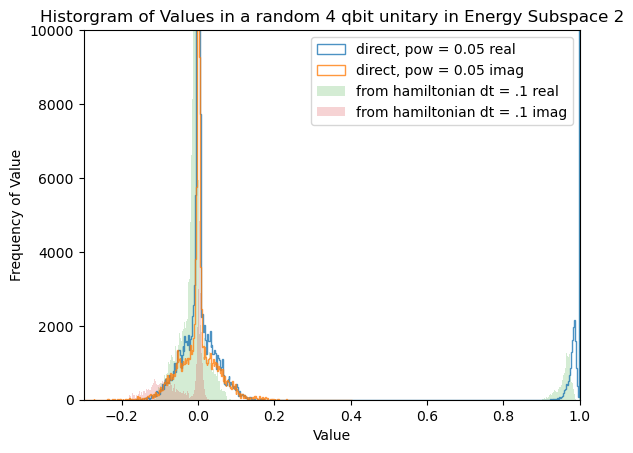

In [59]:
dts = [.05]
for i,random_unitary_ham_data in enumerate(direct):
    plt.hist(np.real(random_unitary_ham_data), alpha=0.8, label=f'direct, pow = {dts[i]} real', bins = 500,histtype = "step")
    plt.hist(np.imag(random_unitary_ham_data), alpha=0.8, label=f'direct, pow = {dts[i]} imag', bins = 500,histtype = "step")
    

plt.hist(np.real(random_unitary_hamiltonian_data), alpha=0.2, label=f'from hamiltonian dt = .1 real', bins = 500,histtype = "bar")
plt.hist(np.imag(random_unitary_hamiltonian_data), alpha=0.2, label=f'from hamiltonian dt = .1 imag', bins = 500,histtype = "bar")

ax = plt.gca()
ax.legend(loc='upper right')
plt.title("Historgram of Values in a random 4 qbit unitary in Energy Subspace 2")
plt.ylabel("Frequency of Value")
plt.xlabel("Value")
ax.set_ylim([0, 10000])
ax.set_xlim([-.3, 1.0])
plt.show()



plt.show()

In [8]:
scipy.stats.ttest_ind(random_unitary_hamiltonian_data,direct[0])

Ttest_indResult(statistic=(-14.385024343875308-41.40975777684283j), pvalue=0.0)

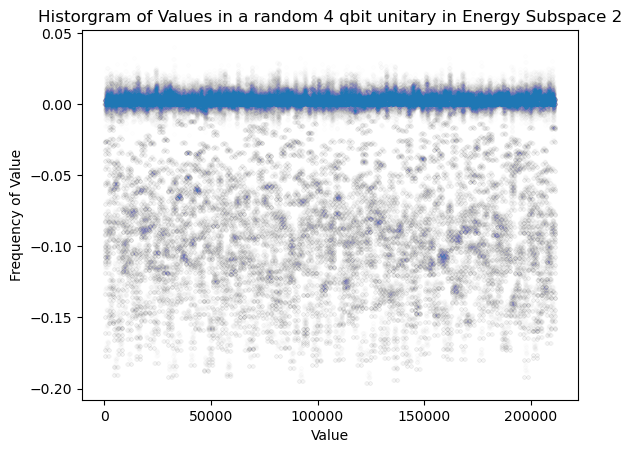

In [60]:
plt.plot(np.imag(random_unitary_hamiltonian_data),'.',alpha = .002)
# plt.plot(np.real(random_unitary_hamiltonian_data),'.',alpha = .005)
# plt.show()

plt.plot(np.imag(direct[0]),'*',alpha = .002)
# plt.plot(np.real(direct[0]),'.',alpha = .005)
# plt.plot([.1 for i in range(len(random_unitary_hamiltonian_data))])
# plt.plot([-.1 for i in range(len(random_unitary_hamiltonian_data))])
plt.title("Historgram of Values in a random 4 qbit unitary in Energy Subspace 2")
plt.ylabel("Frequency of Value")
plt.xlabel("Value")
plt.show()

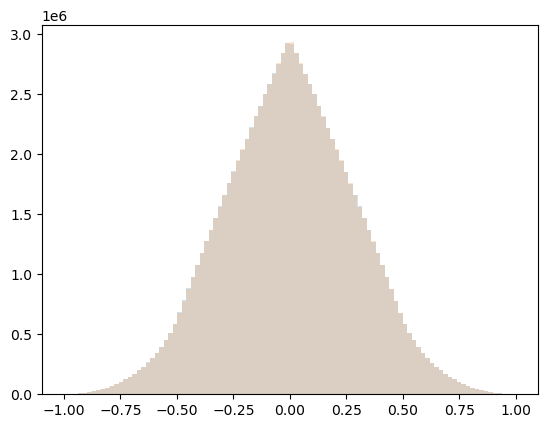

In [10]:
s = 10000;

m = np.random.random((s, s))/2.0*np.exp(1j*2*np.pi*np.random.random((s, s)))
m = (m + m.conj().T);
plt.hist(np.real(m).flatten(),bins = 100,alpha = .2)
plt.hist(np.imag(m).flatten(),bins = 100,alpha = .2)
plt.show()